In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
def reject_outliers(data: list, m = 5.):
    # copy pasta from stack overflow
    # https://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
    data = np.asarray(data)
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s<m]

In [3]:
def _calculate_user_timestamp_diffs(original_set: pd.DataFrame, simulated_set: pd.DataFrame) -> list[list]:

    out = []

    # create differences for each user
    for user in range(1, 32):
        original_user_data = original_set[original_set['user'] == user]
        simulated_user_data = simulated_set[simulated_set['user'] == user]

        assert len(original_user_data) == len(simulated_user_data)

        # assert 15 sets
        assert len(original_user_data['set'].unique()) == len(simulated_user_data['set'].unique()) == 15

        diffs = [None] * len(original_user_data)
        assert len(diffs) == len(original_user_data) == len(simulated_user_data)


        for (i , (original, simulated)) in enumerate(zip(original_user_data['timestamp'], simulated_user_data['timestamp'])):
            diff = abs(original - simulated)
            diffs[i] = diff

        assert len(diffs) == len(original_user_data) == len(simulated_user_data)
        assert not any(elem is None for elem in diffs)

        out.append(diffs)

    assert len(out) == 31


    return out


In [4]:
def calculate_user_distances_diffs(original_set: pd.DataFrame, simulated_set: pd.DataFrame) -> list[list]:

    out = []

    # create differences for each user
    for user in range(1, 32):
        original_user_data = original_set[original_set['user'] == user]
        simulated_user_data = simulated_set[simulated_set['user'] == user]

        assert len(original_user_data) == len(simulated_user_data)

        # assert 15 sets
        assert len(original_user_data['set'].unique()) == len(simulated_user_data['set'].unique()) == 15

        diffs = [None] * len(original_user_data)
        assert len(diffs) == len(original_user_data) == len(simulated_user_data)


        for (i , (original, simulated)) in enumerate(zip(original_user_data['distance'], simulated_user_data['distance'])):
            diff = abs(original - simulated)
            diffs[i] = diff

        assert len(diffs) == len(original_user_data) == len(simulated_user_data)
        assert not any(elem is None for elem in diffs)

        out.append(diffs)

    assert len(out) == 31


    return out

In [5]:
# visualize
def visualize_hist(data: list[list], browser:str, out_file: str):
    data = [[x / 1000 for x in set] for set in data]
    for (i, d) in enumerate(data):
        bef = len(d)
        #d = reject_outliers(d)
        plt.hist(d, label= f'User{i + 1}', alpha=1)
        
    plt.title(f'Differences in distances of input Event between original dataset and simulated dataset ({browser})', fontsize=18)
    plt.xlabel('Difference to last Event (sec)', fontsize=18)
    plt.ylabel('Occurences per User', fontsize=18)
    plt.tight_layout()
    plt.legend()
    plt.savefig(out_file, bbox_inches="tight", pad_inches=0.3)
    plt.show()

def visualize_plot(data: list[list], browser:str, out_file: str):
    data = [[x/ 1000 for x in set] for set in data]
    for (i, d) in enumerate(data):
        d = reject_outliers(d)
        plt.plot(d, label= f'User{i + 1}', alpha=1)
        
    plt.title(f'Differences in distances of input Event between original dataset and simulated dataset ({browser})', fontsize=18)
    plt.xlabel('Input Event (all sets)', fontsize=18)
    plt.ylabel('Difference to last Event (sec)', fontsize=18)
    plt.tight_layout()
    plt.legend()
    plt.savefig(out_file, bbox_inches="tight", pad_inches=0.3)
    plt.show()

def visualize_boxplot(data: list[list], browser:str, out_file: str):
    data = [[x / 1000 for x in set] for set in data]
    plt.boxplot(data, positions = range(31), showfliers=False, labels = [f'User{i}' for i in range(1,32)])

    plt.title(f'Differences in distances of input Event between original dataset and simulated dataset ({browser})', fontsize=18)
    plt.xlabel('Nutzer', fontsize=18)
    plt.ylabel('Difference to last Event (sec)', fontsize=18)
    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight", pad_inches=0.3)
    plt.show()

In [6]:
# calc
def calc(user_diffs: list[list], reject=False):
    all = []
    for l in user_diffs:
        if reject:
            all += reject_outliers(l).tolist()
        else:
            all += l
    all = [x / 1000 for x in all]

    print("Min:  ", round(min(all), 4))
    print("Max:  ", round(max(all), 4))
    print("Mean: ", round(sum(all) / len(all), 4))
    print("STD:  ", round(np.std(all), 4))

In [7]:
# read in original
original = pd.read_csv('./FreeText-Dataset-31-USERS.csv')

labels = [f'User{i}' for i in range(1,32)]
positions = range(31)

In [ ]:
# chrome isolated
chrome_isolated = pd.read_csv('./chrome/isolated/complete.csv')
chrome_isolated_user_diffs = calculate_user_distances_diffs(original, chrome_isolated)

calc(chrome_isolated_user_diffs)

#visualize_hist(chrome_isolated_user_diffs, "Chrome Isolated", "./chrome/isolated/hist.jpeg")
#visualize_plot(chrome_isolated_user_diffs, "Chrome Isolated", "./chrome/isolated/plot.jpeg")
#visualize_boxplot(chrome_isolated_user_diffs, "Chrome Isolated", "./chrome/isolated/box.jpeg")

In [ ]:
# chrome unisolated
chrome_unisolated = pd.read_csv('./chrome/unisolated/complete.csv')
chrome_unisolated_user_diffs = calculate_user_distances_diffs(original, chrome_unisolated)

calc(chrome_unisolated_user_diffs)

#visualize_hist(chrome_unisolated_user_diffs, "Chrome Unisolated", "./chrome/unisolated/hist.jpeg")
#visualize_plot(chrome_unisolated_user_diffs, "Chrome Unisolated", "./chrome/unisolated/hist.jpeg")
#visualize_boxplot(chrome_unisolated_user_diffs, "Chrome Unisolated", "./chrome/unisolated/box.jpeg")

In [ ]:
# chromium isolated
chromium_isolated = pd.read_csv('./chromium/isolated/complete.csv')
chromium_isolated_user_diffs = calculate_user_distances_diffs(original, chromium_isolated)

calc(chromium_isolated_user_diffs)

#visualize_hist(chromium_isolated_user_diffs, "Chromium Isolated", "./chromium/isolated/hist.jpeg")
#visualize_plot(chromium_isolated_user_diffs, "Chromium Isolated", "./chromium/isolated/hist.jpeg")
#visualize_boxplot(chromium_isolated_user_diffs, "Chromium Isolated", "./chromium/isolated/box.jpeg")

In [ ]:
# chromium unisolated
chromium_unisolated = pd.read_csv('./chromium/unisolated/complete.csv')
chromium_unisolated_user_diffs = calculate_user_distances_diffs(original, chromium_unisolated)

calc(chromium_unisolated_user_diffs)

#visualize_hist(chromium_unisolated_user_diffs, "Chromium Unisolated", "./chromium/unisolated/hist.jpeg")
#visualize_plot(chromium_unisolated_user_diffs, "Chromium Unisolated", "./chromium/unisolated/hist.jpeg")
#visualize_boxplot(chromium_unisolated_user_diffs, "Chromium Unisolated", "./chromium/unisolated/box.jpeg")

In [ ]:
# edge isolated
edge_isolated = pd.read_csv('./edge/isolated/complete.csv')
edge_isolated_user_diffs = calculate_user_distances_diffs(original, edge_isolated)

calc(edge_isolated_user_diffs)

#visualize_hist(edge_isolated_user_diffs, "Edge Isolated", "./edge/isolated/hist.jpeg")
#visualize_plot(edge_isolated_user_diffs, "Edge Isolated", "./edge/isolated/hist.jpeg")
#visualize_boxplot(edge_isolated_user_diffs, "Edge Isolated", "./edge/isolated/box.jpeg")

In [ ]:
# edge unisolated
edge_unisolated = pd.read_csv('./edge/unisolated/complete.csv')
edge_unisolated_user_diffs = calculate_user_distances_diffs(original, edge_unisolated)

calc(edge_unisolated_user_diffs)

#visualize_hist(edge_unisolated_user_diffs, "Edge Unisolated", "./edge/unisolated/hist.jpeg")
#visualize_plot(edge_unisolated_user_diffs, "Edge Unisolated", "./edge/unisolated/hist.jpeg")
#visualize_boxplot(edge_unisolated_user_diffs, "Edge Unisolated", "./edge/unisolated/box.jpeg")

In [ ]:
# tor unisolated
tor_unisolated = pd.read_csv('./tor/unisolated/complete.csv')
tor_unisolated_user_diffs = calculate_user_distances_diffs(original, tor_unisolated)

calc(tor_unisolated_user_diffs)

#visualize_hist(tor_unisolated_user_diffs, "Tor Unisolated", "./tor/unisolated/hist.jpeg")
#visualize_plot(tor_unisolated_user_diffs, "Tor Unisolated", "./tor/unisolated/hist.jpeg")
#visualize_boxplot(tor_unisolated_user_diffs, "Tor Unisolated", "./tor/unisolated/box.jpeg")

In [ ]:
# firefox isolated
firefox_isolated = pd.read_csv('./firefox/isolated/complete.csv')
firefox_isolated_user_diffs = calculate_user_distances_diffs(original, firefox_isolated)

calc(firefox_isolated_user_diffs)

#visualize_hist(firefox_isolated_user_diffs, "Firefox Isolated", "./firefox/isolated/hist.jpeg")
#visualize_plot(firefox_isolated_user_diffs, "Firefox Isolated", "./firefox/isolated/hist.jpeg")
#visualize_boxplot(firefox_isolated_user_diffs, "Firefox Isolated", "./firefox/isolated/box.jpeg")

In [ ]:
# firefox unisolated
firefox_unisolated = pd.read_csv('./firefox/unisolated/complete.csv')
firefox_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_unisolated)

calc(firefox_unisolated_user_diffs)


#visualize_hist(firefox_unisolated_user_diffs, "Firefox Unisolated", "./firefox/unisolated/hist.jpeg")
#visualize_plot(firefox_unisolated_user_diffs, "Firefox Unisolated", "./firefox/unisolated/hist.jpeg")
#visualize_boxplot(firefox_unisolated_user_diffs, "Firefox Unisolated", "./firefox/unisolated/box.jpeg")

In [ ]:
# firefox isolated resistFP
firefox_resistFP_isolated = pd.read_csv('./firefox_rf/isolated/complete.csv')
firefox_resistFP_isolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_isolated)

calc(firefox_resistFP_isolated_user_diffs)

#visualize_hist(firefox_resistFP_isolated_user_diffs, "Firefox RFP Isolated", "./firefox_rf/isolated/hist.jpeg")
#visualize_plot(firefox_resistFP_isolated_user_diffs, "Firefox RFP Isolated", "./firefox_rf/isolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_isolated_user_diffs, "Firefox RFP Isolated", "./firefox_rf/isolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP
firefox_resistFP_unisolated = pd.read_csv('./firefox_rf/unisolated/complete.csv')
firefox_resistFP_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_unisolated)

calc(firefox_resistFP_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_unisolated_user_diffs, "Firefox RFP Unisolated", "./firefox_rf/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_unisolated_user_diffs, "Firefox RFP Unisolated", "./firefox_rf/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_unisolated_user_diffs, "Firefox RFP Unisolated", "./firefox_rf/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 20ms
firefox_resistFP_20ms_unisolated = pd.read_csv('./firefox_rf_20/unisolated/complete.csv')
firefox_resistFP_20ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_20ms_unisolated)

calc(firefox_resistFP_20ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_20ms_unisolated_user_diffs, "Firefox RFP 20ms Unisolated", "./firefox_rf_20/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_20ms_unisolated_user_diffs, "Firefox RFP 20ms Unisolated", "./firefox_rf_20/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_20ms_unisolated_user_diffs, "Firefox RFP 20ms Unisolated", "./firefox_rf_20/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 33ms
firefox_resistFP_33ms_unisolated = pd.read_csv('./firefox_rf_33/unisolated/complete.csv')
firefox_resistFP_33ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_33ms_unisolated)

calc(firefox_resistFP_33ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_33ms_unisolated_user_diffs, "Firefox RFP 33.33ms Unisolated", "./firefox_rf_33/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_33ms_unisolated_user_diffs, "Firefox RFP 33.33ms Unisolated", "./firefox_rf_33/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_33ms_unisolated_user_diffs, "Firefox RFP 33.33ms Unisolated", "./firefox_rf_33/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 40ms
firefox_resistFP_40ms_unisolated = pd.read_csv('./firefox_rf_40/unisolated/complete.csv')
firefox_resistFP_40ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_40ms_unisolated)

calc(firefox_resistFP_40ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_40ms_unisolated_user_diffs, "Firefox RFP 40ms Unisolated", "./firefox_rf_40/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_40ms_unisolated_user_diffs, "Firefox RFP 40ms Unisolated", "./firefox_rf_40/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_40ms_unisolated_user_diffs, "Firefox RFP 40ms Unisolated", "./firefox_rf_40/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 60ms
firefox_resistFP_60ms_unisolated = pd.read_csv('./firefox_rf_60/unisolated/complete.csv')
firefox_resistFP_60ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_60ms_unisolated)

calc(firefox_resistFP_60ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_60ms_unisolated_user_diffs, "Firefox RFP 60ms Unisolated", "./firefox_rf_60/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_60ms_unisolated_user_diffs, "Firefox RFP 60ms Unisolated", "./firefox_rf_60/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_60ms_unisolated_user_diffs, "Firefox RFP 60ms Unisolated", "./firefox_rf_60/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 80ms
firefox_resistFP_80ms_unisolated = pd.read_csv('./firefox_rf_80/unisolated/complete.csv')
firefox_resistFP_80ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_80ms_unisolated)

calc(firefox_resistFP_80ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_80ms_unisolated_user_diffs, "Firefox RFP 80ms Unisolated", "./firefox_rf_80/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_80ms_unisolated_user_diffs, "Firefox RFP 80ms Unisolated", "./firefox_rf_80/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_80ms_unisolated_user_diffs, "Firefox RFP 80ms Unisolated", "./firefox_rf_80/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 100ms
firefox_resistFP_100ms_unisolated = pd.read_csv('./firefox_rf_100/unisolated/complete.csv')
firefox_resistFP_100ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_100ms_unisolated)

calc(firefox_resistFP_100ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_100ms_unisolated_user_diffs, "Firefox RFP 100ms Unisolated", "./firefox_rf_100/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_100ms_unisolated_user_diffs, "Firefox RFP 100ms Unisolated", "./firefox_rf_100/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_100ms_unisolated_user_diffs, "Firefox RFP 100ms Unisolated", "./firefox_rf_100/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 120ms
firefox_resistFP_120ms_unisolated = pd.read_csv('./firefox_rf_120/unisolated/complete.csv')
firefox_resistFP_120ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_120ms_unisolated)

calc(firefox_resistFP_120ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_120ms_unisolated_user_diffs, "Firefox RFP 120ms Unisolated", "./firefox_rf_120/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_120ms_unisolated_user_diffs, "Firefox RFP 120ms Unisolated", "./firefox_rf_120/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_120ms_unisolated_user_diffs, "Firefox RFP 120ms Unisolated", "./firefox_rf_120/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 140ms
firefox_resistFP_140ms_unisolated = pd.read_csv('./firefox_rf_140/unisolated/complete.csv')
firefox_resistFP_140ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_140ms_unisolated)

calc(firefox_resistFP_140ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_140ms_unisolated_user_diffs, "Firefox RFP 140ms Unisolated", "./firefox_rf_140/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_140ms_unisolated_user_diffs, "Firefox RFP 140ms Unisolated", "./firefox_rf_140/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_140ms_unisolated_user_diffs, "Firefox RFP 140ms Unisolated", "./firefox_rf_140/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 160ms
firefox_resistFP_160ms_unisolated = pd.read_csv('./firefox_rf_160/unisolated/complete.csv')
firefox_resistFP_160ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_160ms_unisolated)

calc(firefox_resistFP_160ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_160ms_unisolated_user_diffs, "Firefox RFP 160ms Unisolated", "./firefox_rf_160/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_160ms_unisolated_user_diffs, "Firefox RFP 160ms Unisolated", "./firefox_rf_160/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_160ms_unisolated_user_diffs, "Firefox RFP 160ms Unisolated", "./firefox_rf_160/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 180ms
firefox_resistFP_180ms_unisolated = pd.read_csv('./firefox_rf_180/unisolated/complete.csv')
firefox_resistFP_180ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_180ms_unisolated)

calc(firefox_resistFP_180ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_180ms_unisolated_user_diffs, "Firefox RFP 180ms Unisolated", "./firefox_rf_180/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_180ms_unisolated_user_diffs, "Firefox RFP 180ms Unisolated", "./firefox_rf_180/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_180ms_unisolated_user_diffs, "Firefox RFP 180ms Unisolated", "./firefox_rf_180/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 200ms
firefox_resistFP_200ms_unisolated = pd.read_csv('./firefox_rf_200/unisolated/complete.csv')
firefox_resistFP_200ms_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_200ms_unisolated)

calc(firefox_resistFP_200ms_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_200ms_unisolated_user_diffs, "Firefox RFP 200ms Unisolated", "./firefox_rf_200/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_200ms_unisolated_user_diffs, "Firefox RFP 200ms Unisolated", "./firefox_rf_200/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_200ms_unisolated_user_diffs, "Firefox RFP 200ms Unisolated", "./firefox_rf_200/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP NJ
firefox_resistFP_NJ_unisolated = pd.read_csv('./firefox_rf_NJ/unisolated/complete.csv')
firefox_resistFP_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_NJ_unisolated)

calc(firefox_resistFP_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_NJ_unisolated_user_diffs, "Firefox RFP Unisolated", "./firefox_rf_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_NJ_unisolated_user_diffs, "Firefox RFP Unisolated", "./firefox_rf_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_NJ_unisolated_user_diffs, "Firefox RFP NJ Unisolated", "./firefox_rf_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 20ms NJ
firefox_resistFP_20ms_NJ_unisolated = pd.read_csv('./firefox_rf_20_NJ/unisolated/complete.csv')
firefox_resistFP_20ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_20ms_NJ_unisolated)

calc(firefox_resistFP_20ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_20ms_NJ_unisolated_user_diffs, "Firefox RFP 20ms Unisolated", "./firefox_rf_20_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_20ms_NJ_unisolated_user_diffs, "Firefox RFP 20ms Unisolated", "./firefox_rf_20_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_20ms_NJ_unisolated_user_diffs, "Firefox RFP 20ms NJ Unisolated", "./firefox_rf_20_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 33ms NJ
firefox_resistFP_33ms_NJ_unisolated = pd.read_csv('./firefox_rf_33_NJ/unisolated/complete.csv')
firefox_resistFP_33ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_33ms_NJ_unisolated)

calc(firefox_resistFP_33ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_33ms_NJ_unisolated_user_diffs, "Firefox RFP 33.33ms NJ Unisolated", "./firefox_rf_33_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_33ms_NJ_unisolated_user_diffs, "Firefox RFP 33.33ms NJ Unisolated", "./firefox_rf_33_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_33ms_NJ_unisolated_user_diffs, "Firefox RFP 33.33ms NJ Unisolated", "./firefox_rf_33_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 40ms NJ
firefox_resistFP_40ms_NJ_unisolated = pd.read_csv('./firefox_rf_40_NJ/unisolated/complete.csv')
firefox_resistFP_40ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_40ms_NJ_unisolated)

calc(firefox_resistFP_40ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_40ms_NJ_unisolated_user_diffs, "Firefox RFP 40ms NJ Unisolated", "./firefox_rf_40_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_40ms_NJ_unisolated_user_diffs, "Firefox RFP 40ms NJ Unisolated", "./firefox_rf_40_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_40ms_NJ_unisolated_user_diffs, "Firefox RFP 40ms NJ Unisolated", "./firefox_rf_40_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 60ms NJ
firefox_resistFP_60ms_NJ_unisolated = pd.read_csv('./firefox_rf_60_NJ/unisolated/complete.csv')
firefox_resistFP_60ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_60ms_NJ_unisolated)

calc(firefox_resistFP_60ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_60ms_NJ_unisolated_user_diffs, "Firefox RFP 60ms NJ Unisolated", "./firefox_rf_60_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_60ms_NJ_unisolated_user_diffs, "Firefox RFP 60ms NJ Unisolated", "./firefox_rf_60_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_60ms_NJ_unisolated_user_diffs, "Firefox RFP 60ms NJ Unisolated", "./firefox_rf_60_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 80ms NJ
firefox_resistFP_80ms_NJ_unisolated = pd.read_csv('./firefox_rf_60_NJ/unisolated/complete.csv')
firefox_resistFP_80ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_80ms_NJ_unisolated)

calc(firefox_resistFP_80ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_80ms_NJ_unisolated_user_diffs, "Firefox RFP 80ms NJ Unisolated", "./firefox_rf_80_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_80ms_NJ_unisolated_user_diffs, "Firefox RFP 80ms NJ Unisolated", "./firefox_rf_80_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_80ms_NJ_unisolated_user_diffs, "Firefox RFP 80ms NJ Unisolated", "./firefox_rf_80_NJ/unisolated/box.jpeg")

Min:   0.0
Max:   1.17
Mean:  0.0332
STD:   0.0238


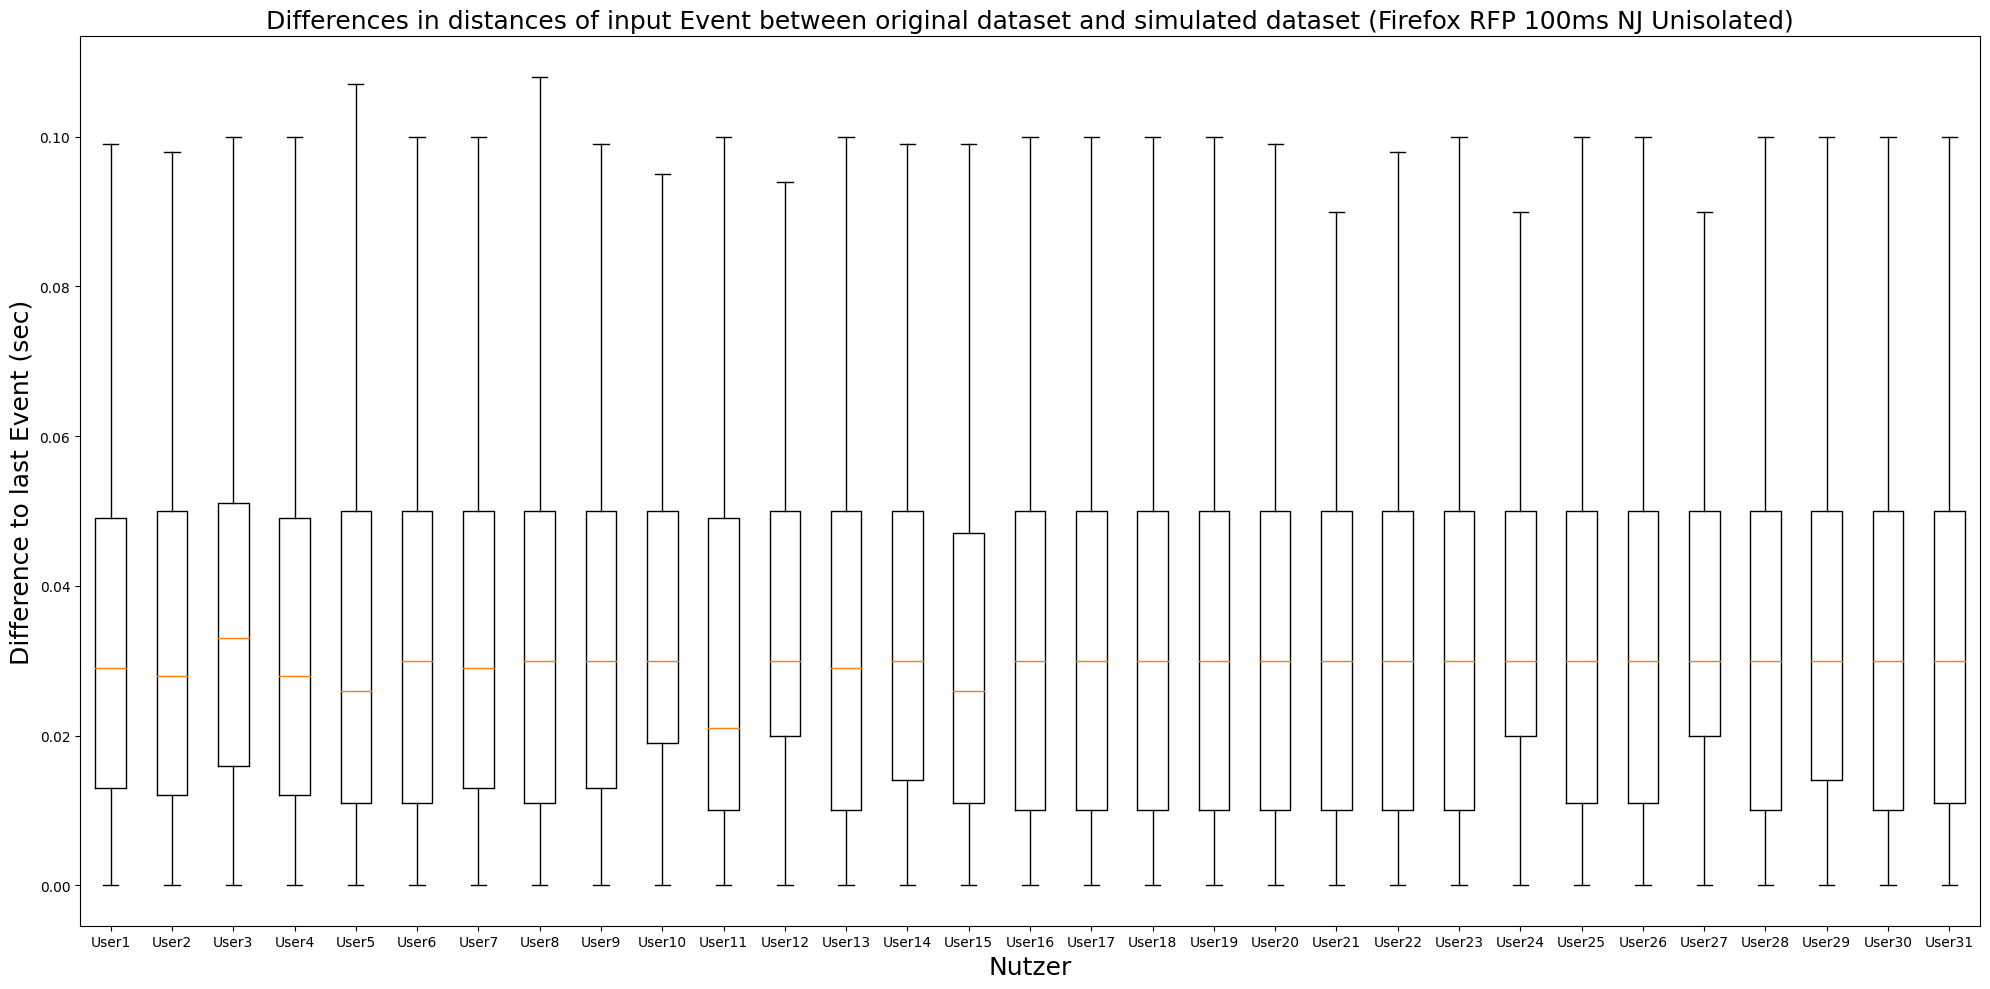

In [8]:
# firefox unisolated resistFP 100ms NJ
firefox_resistFP_100ms_NJ_unisolated = pd.read_csv('./firefox_rf_100_NJ/unisolated/complete.csv')
firefox_resistFP_100ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_100ms_NJ_unisolated)

calc(firefox_resistFP_100ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_100ms_NJ_unisolated_user_diffs, "Firefox RFP 100ms NJ Unisolated", "./firefox_rf_100_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_100ms_NJ_unisolated_user_diffs, "Firefox RFP 100ms NJ Unisolated", "./firefox_rf_100_NJ/unisolated/hist.jpeg")
#visualize_boxplot(firefox_resistFP_100ms_NJ_unisolated_user_diffs, "Firefox RFP 100ms NJ Unisolated", "./firefox_rf_100_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 120ms NJ
firefox_resistFP_120ms_NJ_unisolated = pd.read_csv('./firefox_rf_120_NJ/unisolated/complete.csv')
firefox_resistFP_120ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_120ms_NJ_unisolated)

calc(firefox_resistFP_120ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_120ms_NJ_unisolated_user_diffs, "Firefox RFP 120ms NJ Unisolated", "./firefox_rf_120_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_120ms_NJ_unisolated_user_diffs, "Firefox RFP 120ms NJ Unisolated", "./firefox_rf_120_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_120ms_NJ_unisolated_user_diffs, "Firefox RFP 120ms NJ Unisolated", "./firefox_rf_120_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 140ms NJ
firefox_resistFP_140ms_NJ_unisolated = pd.read_csv('./firefox_rf_140_NJ/unisolated/complete.csv')
firefox_resistFP_140ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_140ms_NJ_unisolated)

calc(firefox_resistFP_140ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_140ms_NJ_unisolated_user_diffs, "Firefox RFP 140ms NJ Unisolated", "./firefox_rf_140_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_140ms_NJ_unisolated_user_diffs, "Firefox RFP 140ms NJ Unisolated", "./firefox_rf_140_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_140ms_NJ_unisolated_user_diffs, "Firefox RFP 140ms NJ Unisolated", "./firefox_rf_140_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 160ms NJ
firefox_resistFP_160ms_NJ_unisolated = pd.read_csv('./firefox_rf_160_NJ/unisolated/complete.csv')
firefox_resistFP_160ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_160ms_NJ_unisolated)

calc(firefox_resistFP_160ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_160ms_NJ_unisolated_user_diffs, "Firefox RFP 160ms NJ Unisolated", "./firefox_rf_160_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_160ms_NJ_unisolated_user_diffs, "Firefox RFP 160ms NJ Unisolated", "./firefox_rf_160_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_160ms_NJ_unisolated_user_diffs, "Firefox RFP 160ms NJ Unisolated", "./firefox_rf_160_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 180ms NJ
firefox_resistFP_180ms_NJ_unisolated = pd.read_csv('./firefox_rf_180_NJ/unisolated/complete.csv')
firefox_resistFP_180ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_180ms_NJ_unisolated)

calc(firefox_resistFP_180ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_180ms_NJ_unisolated_user_diffs, "Firefox RFP 180ms NJ Unisolated", "./firefox_rf_180_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_180ms_NJ_unisolated_user_diffs, "Firefox RFP 180ms NJ Unisolated", "./firefox_rf_180_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_180ms_NJ_unisolated_user_diffs, "Firefox RFP 180ms NJ Unisolated", "./firefox_rf_180_NJ/unisolated/box.jpeg")

In [ ]:
# firefox unisolated resistFP 180ms NJ
firefox_resistFP_200ms_NJ_unisolated = pd.read_csv('./firefox_rf_200_NJ/unisolated/complete.csv')
firefox_resistFP_200ms_NJ_unisolated_user_diffs = calculate_user_distances_diffs(original, firefox_resistFP_200ms_NJ_unisolated)

calc(firefox_resistFP_200ms_NJ_unisolated_user_diffs)

#visualize_hist(firefox_resistFP_200ms_NJ_unisolated_user_diffs, "Firefox RFP 200ms NJ Unisolated", "./firefox_rf_200_NJ/unisolated/hist.jpeg")
#visualize_plot(firefox_resistFP_200ms_NJ_unisolated_user_diffs, "Firefox RFP 200ms NJ Unisolated", "./firefox_rf_200_NJ/unisolated/hist.jpeg")
visualize_boxplot(firefox_resistFP_200ms_NJ_unisolated_user_diffs, "Firefox RFP 200ms NJ Unisolated", "./firefox_rf_200_NJ/unisolated/box.jpeg")